<a href="https://colab.research.google.com/github/gjsin1105/DAP__/blob/main/FinalProject(201811895).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2000년부터 2021년까지 선수들의 수입 변화

* 수입(Earnings)의 기본 단위는 백만달러(million of $)이다.
* 13종류의 스포츠가 있으며 스포츠 종목마다 해당 종목에 속한 데이터 수가 천차만별일 수도 있다.
* 2001년도 선수들의 수입정보는 없다.
* 기존의 데이터에서 선수들의 국적에 대한 정보를 추가했다.
* 참고자료: https://www.kaggle.com/darinhawley/forbes-high-paid-athletes-19902021

한글 깨짐 현상을 없애기 위해 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install dash
!pip install jupyter_dash

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

연도에 따른 선수들의 수입 정도, 국적 그리고 해당 선수들이 속한 스포츠 종류에 대한 데이터가 있다.

In [47]:
df = pd.read_csv('athlete/athletesv.csv', encoding='cp949')
df

,Name,Earnings,Year,Sport,Nationality
0,Conor McGregor,180.0,2021,Mixed Martial Arts,Ireland
1,Lionel Messi,130.0,2021,Soccer,Argentina
2,Cristiano Ronaldo,120.0,2021,Soccer,Portugal
3,Dak Prescott,107.5,2021,Football,USA
4,LeBron James,96.5,2021,Basketball,USA
...,...,...,...,...,...
1280,Martina Hingis,11.0,2000,Tennis,Slovakia
1281,Anna Kournikova,10.0,2000,Tennis,Russia
1282,Venus Williams,10.0,2000,Tennis,USA
1283,Serena Williams,7.5,2000,Tennis,USA


##각 스포츠의 데이터 수
스포츠 종목별로 해당 스포츠에 속하는 데이터 개수가 어느정도인지 알아본다.

(선수 이름에 대한 중복은 상관없으며 해당 종목에 속하면 카운트된다.)

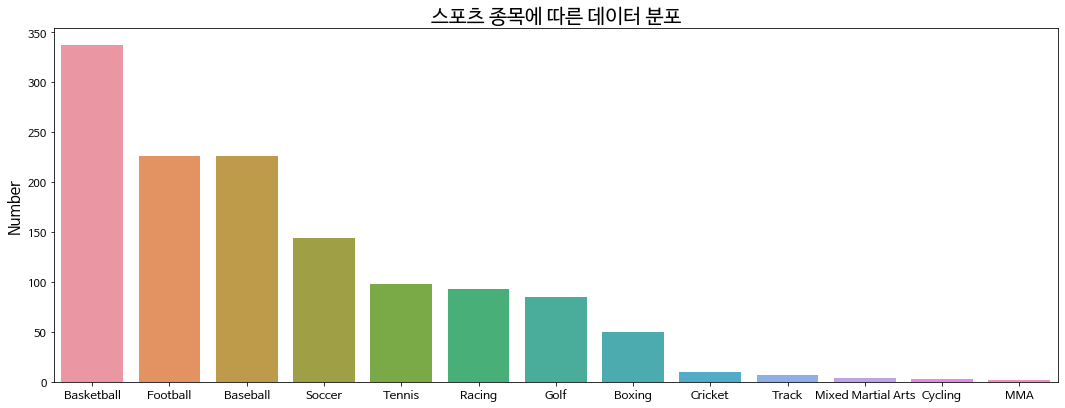

In [24]:
numkind = df.groupby('Sport')['Sport'].count().sort_values(ascending=False)
sport_kind = [sport for sport in numkind.index]
plt.figure(figsize=(18, 6.5))
plt.title("스포츠 종목에 따른 데이터 분포", size=20)
sns.barplot(x=sport_kind, y=numkind)
plt.xticks(fontsize=12)
plt.ylabel('Number', size=15)
plt.show()

In [98]:
sport_total = df.groupby('Nationality')['Earnings'].sum().sort_values()
sport_total

Nationality
Puerto Rico                    18.0
Panama                         18.6
Nederland                      19.5
Latvia                         24.5
Fiji                           25.8
Slovakia                       26.0
Poland                         34.0
New Zealand                    50.7
Chile                          56.4
Cameroon                       75.2
Cuba                           78.4
Belguium                       96.6
Egypt                          97.7
Cote d'Ivoire                 102.3
Uruguay                       112.3
Canada                        117.9
Colombia                      134.3
Republic of South Africa      148.2
China                         158.3
Greece                        173.3
Kazakhstan                    174.5
Jamaica                       186.4
Finland                       190.0
Italy                         210.0
Australia                     220.7
Sweden                        221.6
India                         256.6
Mexico          

##종목별 총 수입
스포츠 종목별로 해당 스포츠에 속한 선수들의 수입을 합하고 각각 어느 정도의 수입을 기록했는지 나타낸다.




In [25]:
sport_total = df.groupby('Sport')['Earnings'].sum().sort_values()
sport_total

Sport
MMA                      56.0
Cycling                  68.2
Track                   186.4
Cricket                 256.6
Mixed Martial Arts      374.0
Boxing                 2523.4
Tennis                 2958.7
Racing                 3014.6
Golf                   3459.4
Baseball               5339.1
Soccer                 5382.5
Football               6909.9
Basketball            10504.8
Name: Earnings, dtype: float64

##선수들의 평균 수입
2000년부터 2021년까지의 선수들 전체의  평균 수입을 구하고 개개인의 수입이 평균을 넘는지 안넘는지 카운트하여 그 정도를 파악한다.

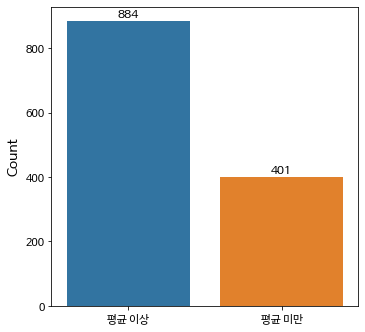

In [96]:
avg = df['Earnings'].mean() ## 평균 수입=31.933
avg_count = (df['Earnings']>=avg).value_counts()
plt.figure(figsize=(5.5, 5.5))
x = [0, 1]
for i, v in enumerate(x): ## 값 표시:https://pydole.tistory.com/entry/Python-matplotlib-%EA%B7%B8%EB%9E%98%ED%94%84%EC%97%90-%EA%B0%92-%ED%91%9C%EC%8B%9C-%ED%95%98%EA%B8%B0 참조
    plt.text(v, avg_count[i], avg_count[i],
             fontsize=12, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
sns.barplot(x=['평균 이상', '평균 미만'], y=avg_count)
plt.ylabel('Count')
plt.show()

스포츠 종목별로 선수들의 평균 수입이 어느정도인지 비교한다.

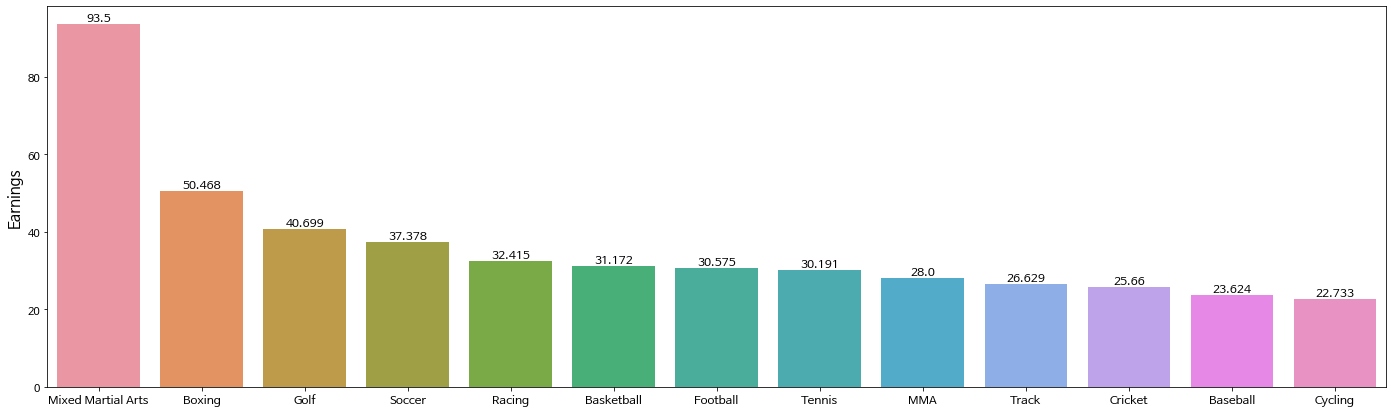

In [94]:
plt.figure(figsize=(24, 7))
plt.xticks(fontsize=12)
plt.ylabel('Earnings', size=15)
avgtotal = df.groupby('Sport')['Earnings'].mean().round(3).sort_values(ascending=False)
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for i, v in enumerate(x):
    plt.text(v, avgtotal[i], avgtotal[i],
             fontsize=12, 
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
sport_kind = [sport for sport in avgtotal.index]
sns.barplot(x=sport_kind, y=avgtotal)
plt.grid(False)
plt.show()

##선수들 개인의 수입 비교
2000년부터 2021년까지의 선수들 개인의 총 수입을 구한다.

In [27]:
athlete_total = df.groupby('Name')['Earnings'].sum().sort_values()
athlete_total

Name
Jennifer Capriati       6.0
Danica Patrick          7.0
Lorena Ochoa           10.0
Ana Ivanovic           10.0
Lindsay Davenport      12.0
                      ...  
Lionel Messi          911.5
Roger Federer         933.1
Cristiano Ronaldo     942.9
Floyd Mayweather      944.5
Tiger Woods          1523.5
Name: Earnings, Length: 430, dtype: float64

위에서 구한 선수들 개인의 총 수입을 가지고 상위 5명의 정보를 나타낸다.

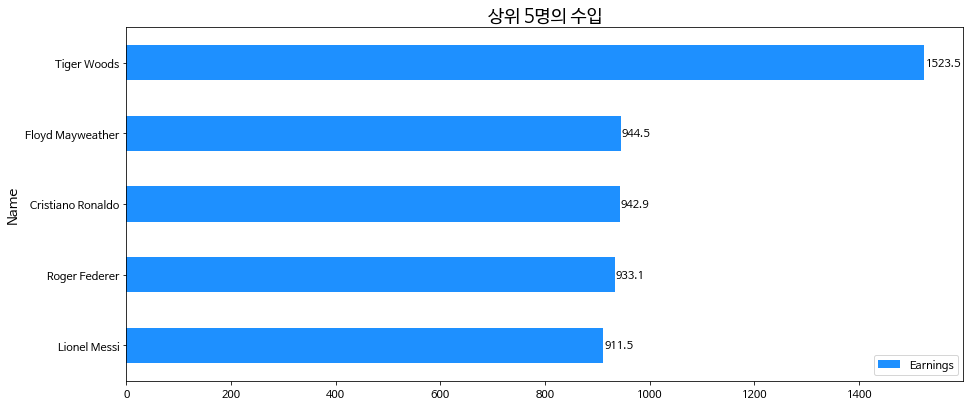

In [97]:
top = pd.DataFrame(athlete_total)
topincome = top.iloc[len(athlete_total)-5:len(athlete_total)+1]
plt.rc('font', size=11)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
ax = topincome.plot(kind='barh', figsize=(15, 6.5), title='상위 5명의 수입', color='dodgerblue', grid=False)
for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.002, y+height/2, "%.1f"%(width), va='center')

## 스포츠 종목별 최고 수입
2000년부터 2021년의 기간중에 각 스포츠별로 수입이 가장 높은 연도와 선수 정보를 나타낸다.

In [35]:
df.loc[df.reset_index().groupby('Sport')['Earnings'].idxmax()]  ## https://yganalyst.github.io/data_handling/memo_13/ 참조

,Name,Earnings,Year,Sport,Nationality
167,Mike Trout,50.6,2019,Baseball,USA
4,LeBron James,96.5,2021,Basketball,USA
550,Floyd Mayweather,300.0,2015,Boxing,USA
765,Mahendra Singh Dhoni,31.5,2013,Cricket,India
1142,Lance Armstrong,28.0,2005,Cycling,USA
3,Dak Prescott,107.5,2021,Football,USA
1068,Tiger Woods,115.0,2008,Golf,USA
373,Conor McGregor,34.0,2017,MMA,Ireland
0,Conor McGregor,180.0,2021,Mixed Martial Arts,Ireland
7,Lewis Hamilton,82.0,2021,Racing,United Kingdom


##국가별 수입이 가장 높은 선수
국가별로 해당 국적의 선수들 가운데 수입이 가장 높은 선수의 수입 정보를 나타낸다.

In [ ]:
df.loc[df.reset_index().groupby('Nationality')['Earnings'].idxmax()]

##특정 기간동안의 선수의 수입 변화
자신이 궁금해하는 선수의 특정 기간 동안의 수입 변화를 나타낸다.

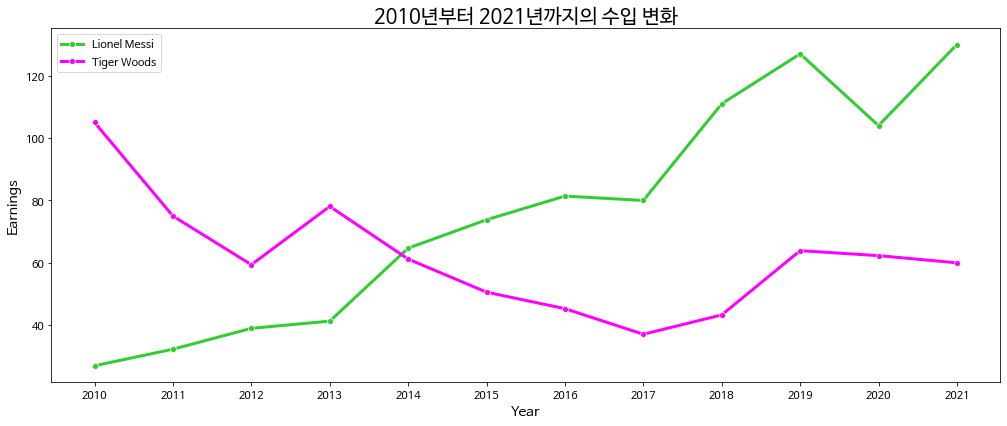

In [30]:
df12 = df.iloc[:1050]
df1 = df12.loc[:, ['Name', 'Earnings', 'Year']]
df2 = df1.loc[df1['Name']=='Lionel Messi']
df3 = df1.loc[df1['Name']=='Tiger Woods']
fig = plt.figure(figsize=(17,6.5))
plt.title('2010년부터 2021년까지의 수입 변화',fontsize=20)
plt.xlabel('Year')
plt.ylabel('Earnings')
sns.lineplot(x=df2['Year'], y=df2['Earnings'], label='Lionel Messi', linewidth=3, color='limegreen', marker="o")
sns.lineplot(x=df3['Year'], y=df3['Earnings'], label='Tiger Woods', linewidth=3, color='magenta', marker="o")
plt.xticks(np.arange(2010, 2022), ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'))
plt.show()

##연도별 수입이 가장 높은 선수들의 정보
기존의 dataframe에서 연도별로 가장 많은 수입을 기록한 선수들의 정보를 가져와서 새로운 dataframe을 만든다.

In [31]:
data2000 = df[df['Year']==2000][:1]
data2002 = df[df['Year']==2002][:1]
data2003 = df[df['Year']==2003][:1]
data2004 = df[df['Year']==2004][:1]
data2005 = df[df['Year']==2005][:1]
data2006 = df[df['Year']==2006][:1]
data2007 = df[df['Year']==2007][:1]
data2008 = df[df['Year']==2008][:1]
data2009 = df[df['Year']==2009][:1]
data2010 = df[df['Year']==2010][:1]
data2011 = df[df['Year']==2011][:1]
data2012 = df[df['Year']==2012][:1]
data2013 = df[df['Year']==2013][:1]
data2014 = df[df['Year']==2014][:1]
data2015 = df[df['Year']==2015][:1]
data2016 = df[df['Year']==2016][:1]
data2017 = df[df['Year']==2017][:1]
data2018 = df[df['Year']==2018][:1]
data2019 = df[df['Year']==2019][:1]
data2020 = df[df['Year']==2020][:1]
data2021 = df[df['Year']==2021][:1]
top_year = pd.concat([data2000, data2002, data2003, data2004, data2005, data2006, data2007, data2008, data2009, data2010, data2011, data2012, data2013, data2014, data2015, data2016, data2017, data2018, data2019, data2020, data2021])
top_year

,Name,Earnings,Year,Sport,Nationality
1259,Michael Schumacher,59.0,2000,Racing,Germany
1234,Tiger Woods,69.0,2002,Golf,USA
1209,Tiger Woods,78.0,2003,Golf,USA
1159,Tiger Woods,80.3,2004,Golf,USA
1134,Tiger Woods,87.0,2005,Golf,USA
1114,Tiger Woods,90.0,2006,Golf,USA
1089,Tiger Woods,100.0,2007,Golf,USA
1068,Tiger Woods,115.0,2008,Golf,USA
1050,Tiger Woods,110.0,2009,Golf,USA
1000,Tiger Woods,105.0,2010,Golf,USA


연도별로 수입순위 1위에 대해서 차이가 어느 정도인지를 알아본다.

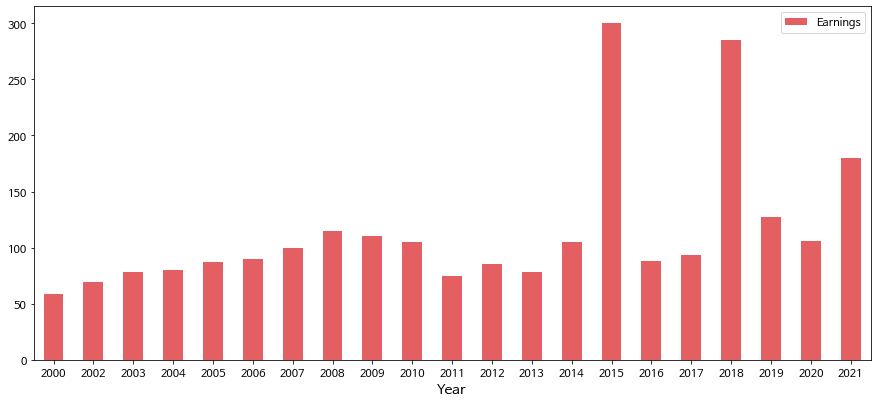

In [32]:
top_year.plot(kind='bar', figsize=(15, 6.5), x='Year', y='Earnings', color='#e35f62')
plt.xticks(rotation=0)
plt.show()

연도별로 가장 많은 수입을 기록한 선수의 스포츠 종목을 종합하고 각 스포츠의 비율이 어떻게 되는지 나타낸다.

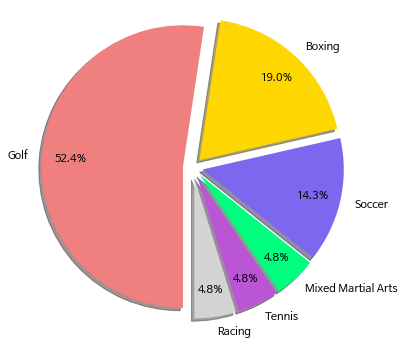

In [33]:
sportcount = top_year.value_counts('Sport')
fig, ax = plt.subplots(figsize=(6,6))
colors = ['lightcoral', 'gold', 'mediumslateblue', 'springgreen', 'mediumorchid','lightgrey']
ax.pie(sportcount, labels=['Golf','Boxing','Soccer','Mixed Martial Arts', 'Tennis', 'Racing'],
       autopct="%1.1f%%", pctdistance=0.8, explode=(0.07,0.07,0.07,0.07,0.07,0.07), startangle=270, counterclock=False, shadow=True, colors=colors)
ax.axis('equal')
plt.show()